<a href="https://colab.research.google.com/github/2estherblaise-max/ECON3916-Statical-Machine-Learning./blob/main/Lab%203/%20Lab3_Benchmarking_Development_with_WBGAPIipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install wbgapi

In [28]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: EGY (Egypt, Arab ReP.) MC (Upper Middle Income), WLD (World)
country_codes = ['EGY', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [29]:
# 1. Fetch Data
print("Fetching data...")
# df_raw from wbgapi.data.DataFrame usually has MultiIndex(economy, indicator_code) as index and Years as columns.
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(1970, 2025))

# df_raw structure: index=MultiIndex(economy_code, indicator_code), columns=Year

# 2. Transpose the DataFrame so that Years are the index and economies/indicators are columns
df_transposed = df_raw.T

# df_transposed structure: index=Year, columns=MultiIndex(economy_code, indicator_code)

# 3. Clean and set the Year index
df_transposed.index = df_transposed.index.str.replace('YR', '').astype(int)
df_transposed.index.name = 'Year'
df = df_transposed.sort_index()

# df structure: index=Year, columns=MultiIndex(economy_code, indicator_code)

# 4. Rename indicator codes to descriptive names (level 1 of columns)
# The indicators are at level 1 of the columns now (economy_code is level 0, indicator_code is level 1)
df.rename(columns=indicators, level=1, inplace=True)

# df structure: index=Year, columns=MultiIndex(economy_code, indicator_name)

# 5. Extract Egypt, Arab Rep for specific calculations
# df_egy will be a DataFrame with Year index and indicator_name columns for 'EGY' only
df_egy = df['EGY'].copy()

Fetching data...


In [30]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_egy['Natural_Rate_Unemp'] = df_egy['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_egy['Productivity'] = df_egy['GDP_Const'] / df_egy['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_egy['NCO'] = df_egy['Exports_GDP'] - df_egy['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_egy['Budget_Balance'] = df_egy['Tax_Rev_GDP'] - df_egy['Gov_Exp_GDP']

In [31]:
# —- CALCULATIONS FOR Egypt, Arab Rep —-

# 1. Natural Rate of Unemployment (5-Year Moving Average)

# Smoothing out business cycles to find structural unemp loyment
df_egy[ 'Natural_Rate_Unemp'] = df_egy['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
# Formula: Real GDP / Total Labor Force
df_egy ['Productivity'] = df_egy['GDP_Const'] / df_egy[ 'Labor_Force_Total']

# 3. Net Capital Outflow (NCO)
# Formula: Exports - Imports
df_egy ['NCO'] = df_egy['Exports_GDP'] - df_egy['Imports_GDP']

#4. Government Budget BLNCE
#Formula: Tax Revenue - Gov Expenditure
df_egy['Budget_Balance'] = df_egy['Tax_Rev_GDP'] - df_egy['Gov_Exp_GDP']

print("Calculations Complete.")

Calculations Complete.


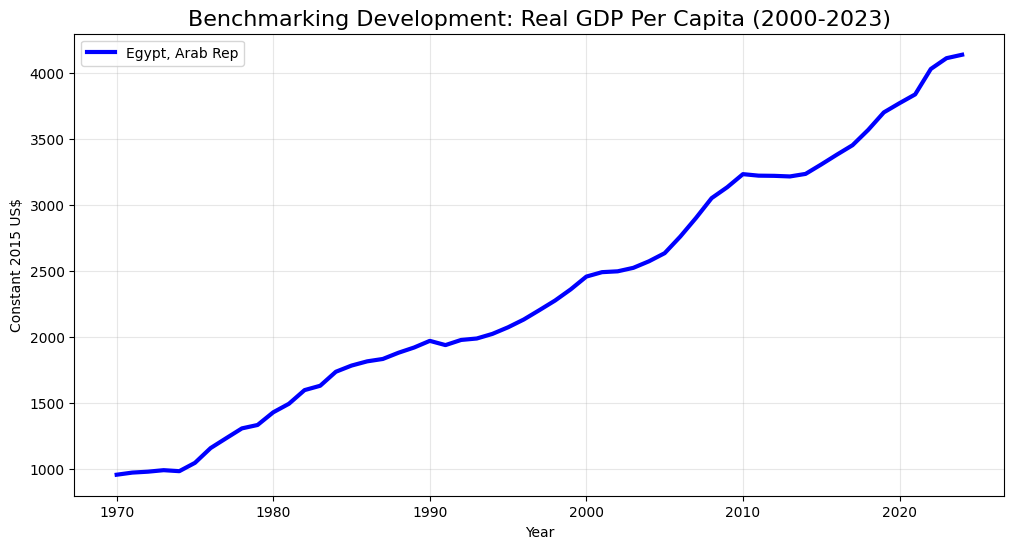

In [32]:
plt.figure(figsize=(12, 6))
# Plot ONLY Egypt, Arab Rep
plt.plot(df_egy.index, df_egy['GDP_Per_Capita_Const'], label='Egypt, Arab Rep', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

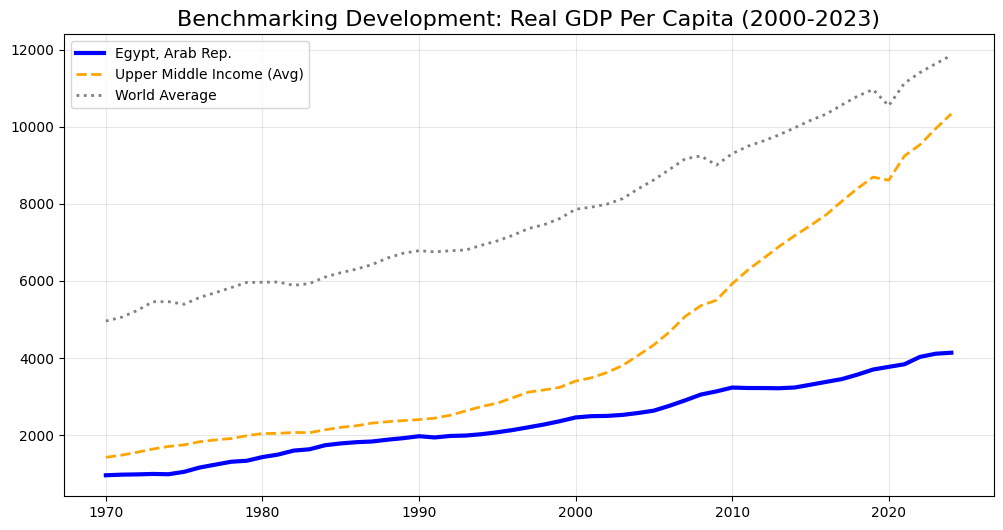

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('EGY', 'GDP_Per_Capita_Const')], label='Egypt, Arab Rep.', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

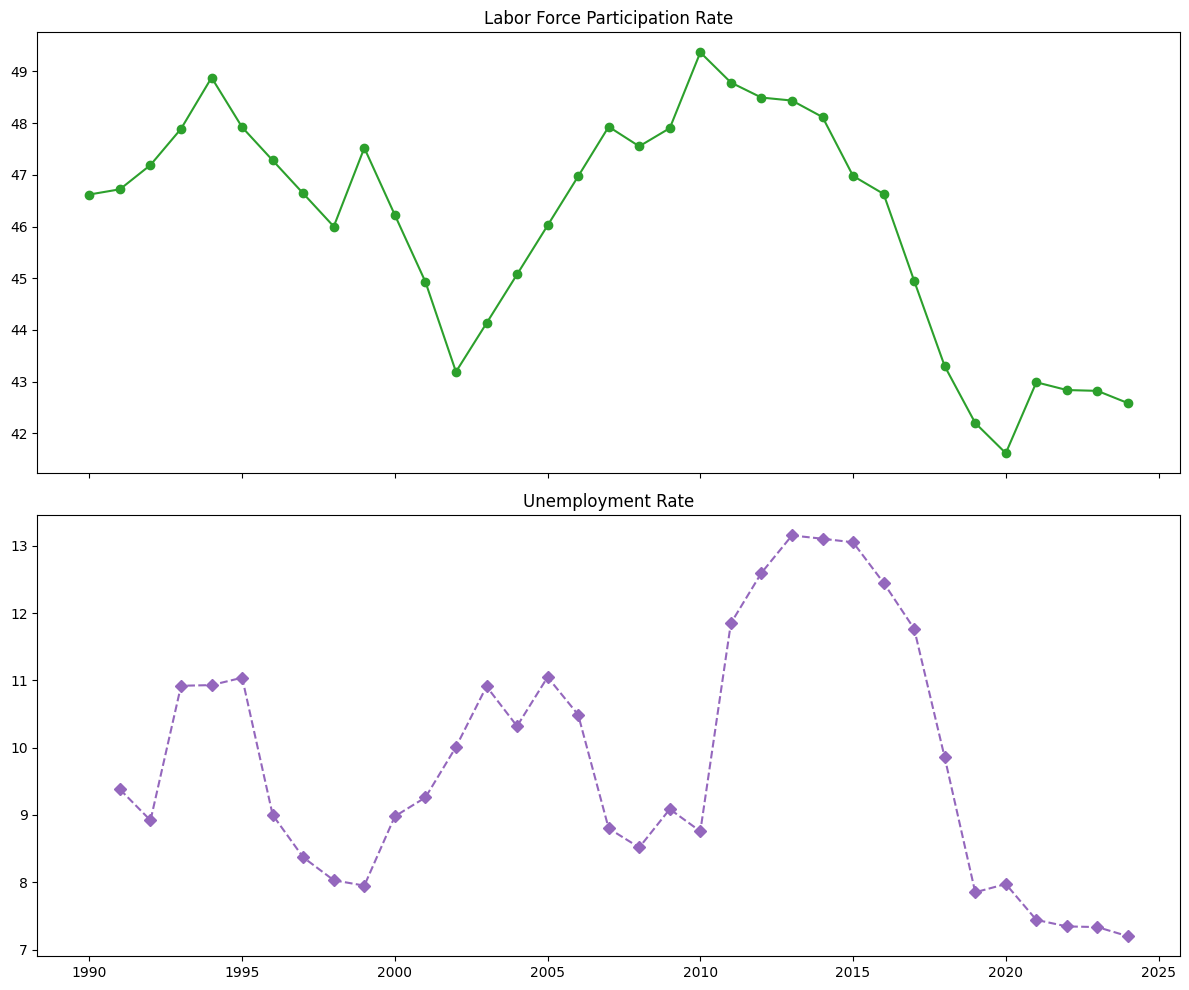

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_egy.index, df_egy['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_egy.index, df_egy['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

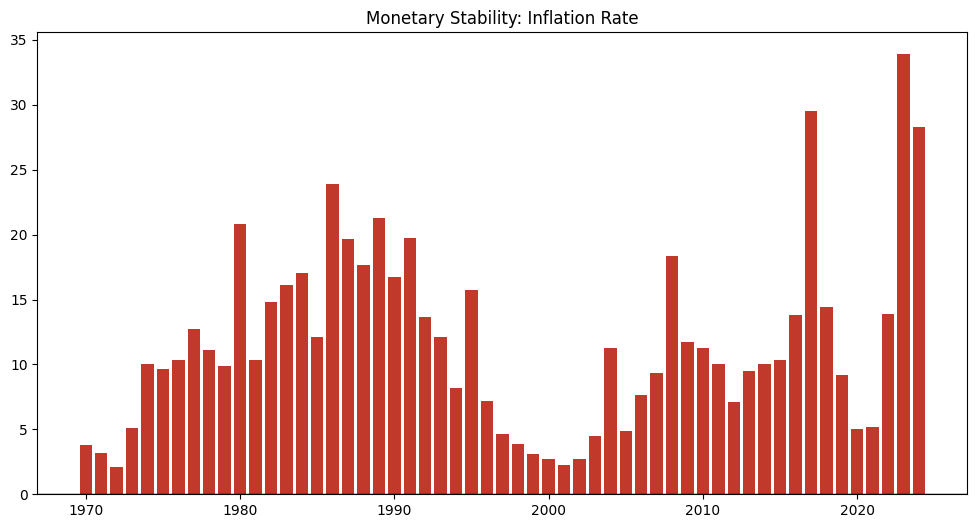

In [36]:
plt.figure(figsize=(12, 6))

plt.bar(df_egy.index, df_egy['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

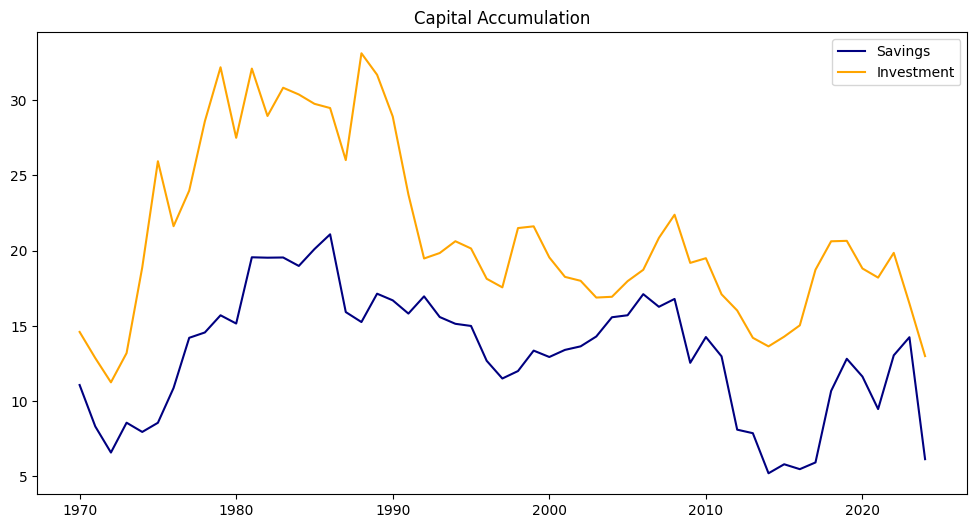

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_egy.index, df_egy['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_egy.index, df_egy['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

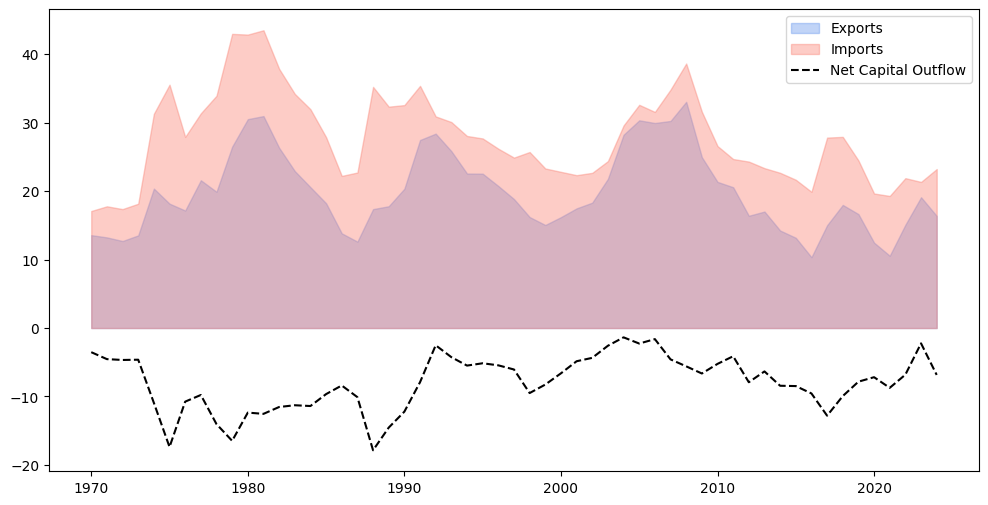

In [39]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_egy.index, df_egy['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_egy.index, df_egy['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_egy.index, df_egy['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

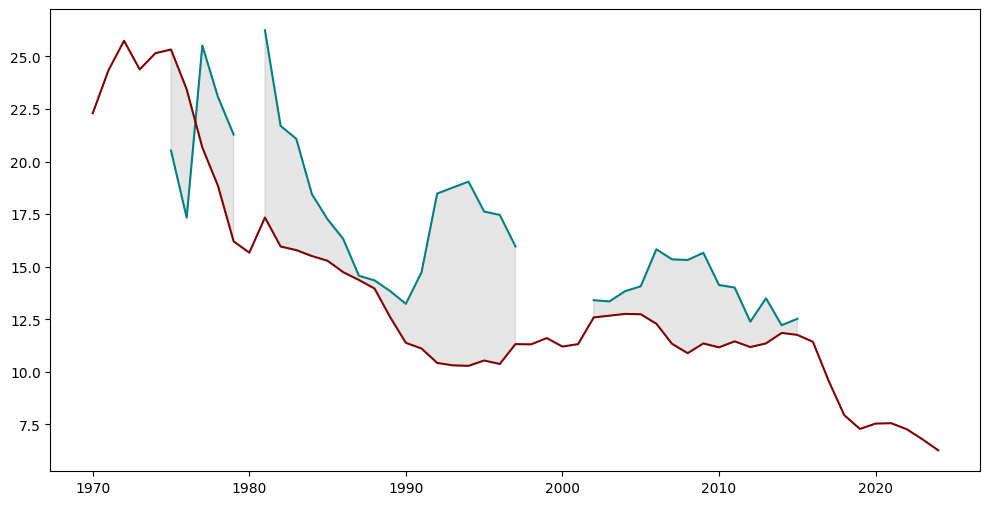

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(df_egy.index, df_egy['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_egy.index, df_egy['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_egy.index, df_egy['Tax_Rev_GDP'], df_egy['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

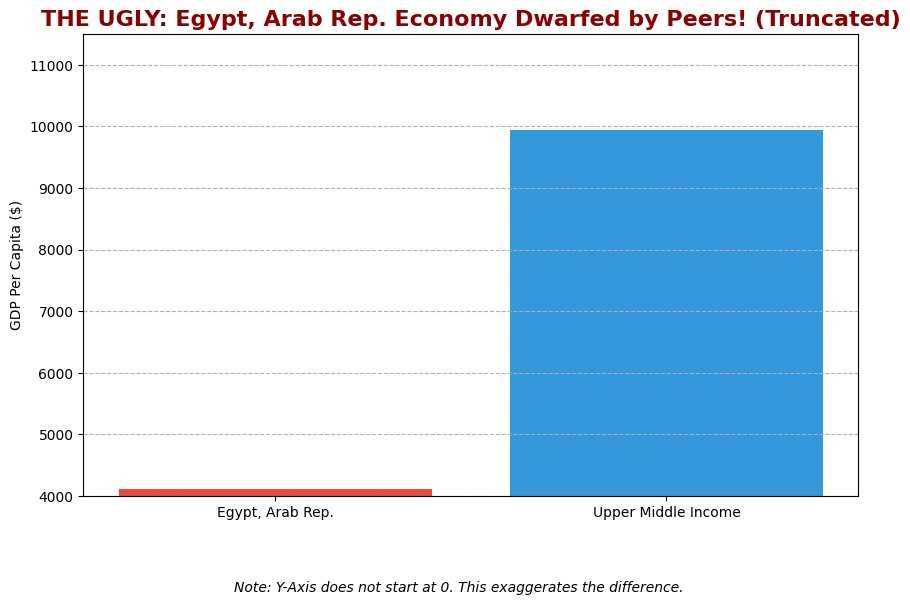

In [42]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
egy_val = df.loc[snapshot_year, ('EGY', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [egy_val, umc_val]
labels = ['Egypt, Arab Rep.', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Egypt, Arab Rep is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Egypt, Arab Rep. Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

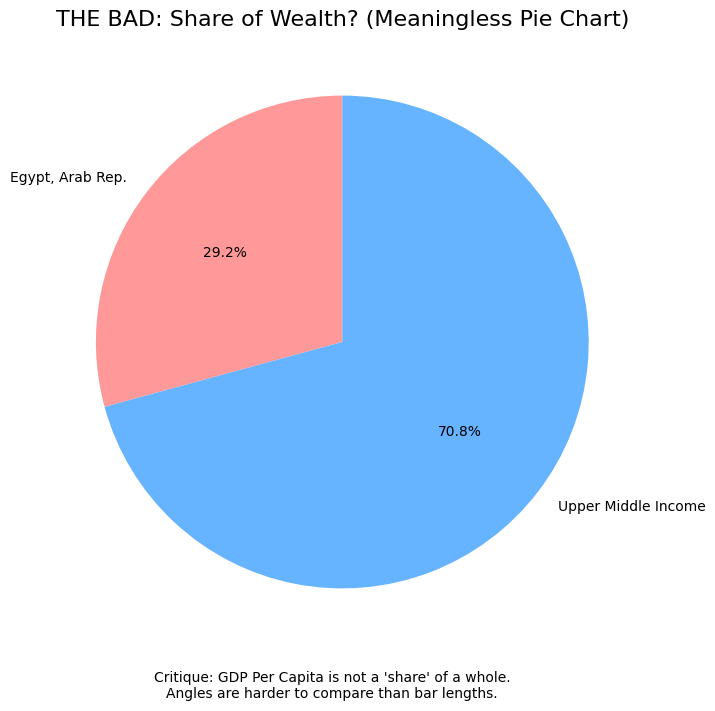

In [43]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()